## Linear regression

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
#read input from csv files
x = pd.read_csv('linearX.csv')
y = pd.read_csv('linearY.csv')

#make numpy array of values
x = x.values
y = y.values

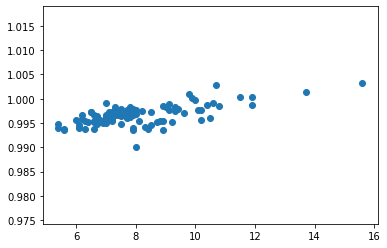

In [11]:
plt.scatter(x,y)
plt.show()

Normalise data

In [12]:
X = (x - x.mean())/x.std()
Y = y

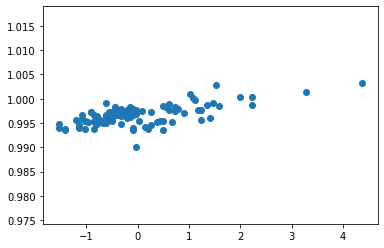

In [13]:
plt.scatter(X,Y)
plt.show()

In [15]:
x.shape[0]

99

## Gradient algorithm
        -start with a random theta
        -repeat untill convergence
                -decrease theta according to the rule

In [139]:
def hypothesis(x,theta):
    return theta[0] + theta[1]*x

def error(X,Y,theta):
    m = X.shape[0]
    error_init = 0
    for i in range(m):
        error_init += (Y[i] - hypothesis(X[i],theta))**2
    return error_init
def gradient(X,Y,theta):
    grad = np.zeros((2,))
    m = X.shape[0]
    for i in range(m):
        grad[0] += (hypothesis(X[i],theta) - Y[i])
        grad[1] += (hypothesis(X[i],theta) - y[i])*X[i]
    return grad

#main algorithm
def gradient_descent(X,Y,learning_factor = 0.01):
    theta = np.zeros((2,))
    error_list = []
    #itr = 0
    while(error(X,Y,theta) > 0.001):
        e = error(X,Y,theta)
        error_list.append(e)
        grad = gradient(X,Y,theta)
        theta[0] = theta[0] - learning_factor*grad[0]
        theta[1] = theta[1] - learning_factor*grad[1]
        #itr+=1
    return theta , error_list
    


In [140]:
final_theta , error_plot = gradient_descent(X,Y)

In [141]:
testx = np.linspace(-2,5,10)

In [142]:
hypothesis_y = hypothesis(testx,final_theta)

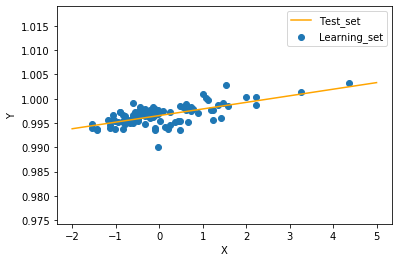

In [143]:
plt.scatter(X,Y,label = 'Learning_set')
plt.plot(testx,hypothesis_y,color = 'orange',label = 'Test_set')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

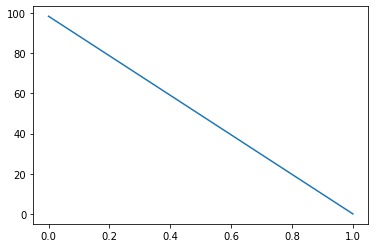

In [144]:
plt.plot(error_plot)
plt.show()